In [4]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [6]:
# separating by groups
g1 = df.loc[df['group'] == 1]
g2 = df.loc[df['group'] == 2]
g3 = df.loc[df['group'] == 3]

### For each group, is there a significant difference between time 1 and time 2?

Ttest_indResult(statistic=-0.1361692237300229, pvalue=0.8917563522050916)

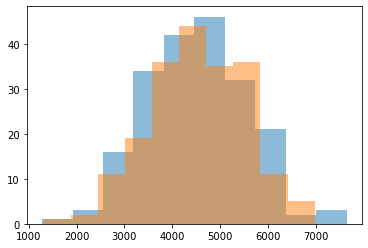

In [7]:
plt.hist(g1['t1'],alpha=0.5)
plt.hist(g1['t2'],alpha=0.5)
stats.ttest_ind(g1['t1'],g1['t2'])

Ttest_indResult(statistic=0.1135663078222387, pvalue=0.9096966639687307)

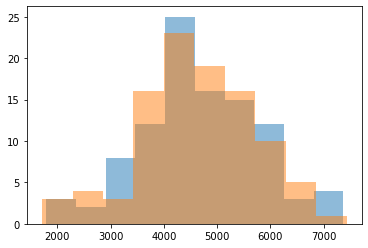

In [8]:
plt.hist(g2['t1'],alpha=0.5)
plt.hist(g2['t2'],alpha=0.5)
stats.ttest_ind(g2['t1'],g2['t2'])

Ttest_indResult(statistic=0.26956930881083657, pvalue=0.7877723385234005)

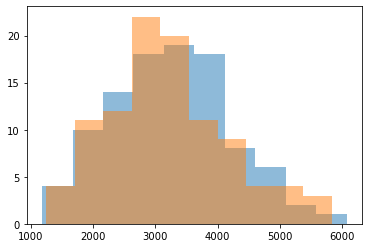

In [9]:
plt.hist(g3['t1'],alpha=0.5)
plt.hist(g3['t2'],alpha=0.5)
stats.ttest_ind(g3['t1'],g3['t2'])

## As shown above with the p-values between the groups, there is no significant difference between time1 and time2

### Is there a significant difference in the mean of all groups at time 2? 

In [10]:
print('Group 1: ', stats.shapiro(g1['t2']))
print('Group 2: ', stats.shapiro(g2['t2']))
print('Group 3: ', stats.shapiro(g3['t2']))

Group 1:  ShapiroResult(statistic=0.9955824613571167, pvalue=0.8313238024711609)
Group 2:  ShapiroResult(statistic=0.9911357164382935, pvalue=0.7556766271591187)
Group 3:  ShapiroResult(statistic=0.9781965613365173, pvalue=0.09609080106019974)


In [11]:
stats.f_oneway(g1['t2'],g2['t2'],g3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

## There is a significant difference in the mean of all the groups at time 2, considering that the p-value of the ANOVA test is extremely lower than 1%.

In [3]:
tukey = pairwise_tukeyhsd(endog = g1['t1'],groups = g1['t2'],alpha=0.05)
tukey.summary()

NameError: name 'g1' is not defined